<center><h1>Masters_Daniel_HW4</h1></center>
<br>
<br>

Name: Daniel Masters
<br>
Github Username: damasters
<br>
USC ID: 6203966352

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

Get the AReM Data Set

In [2]:
# Getting all AReM datasets to construct training and test datasets
test_data_bending = []
for i in range(1,3):
    for j in range(1,3):
        test_data = pd.read_csv('bending'+str(i)+'/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
        test_data_bending.append(test_data)
       
train_data_bending1 = []
for j in range(3,8):
    train_data = pd.read_csv('bending1/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    train_data_bending1.append(train_data)
    
train_data_bending2 = []
train_data_3 = pd.read_csv('bending2/dataset3.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
train_data_4 = pd.read_csv('bending2/dataset4.csv', skiprows=5, header=None, sep=' ', names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
train_data_bending2.append(train_data_3)
train_data_bending2.append(train_data_4)
for j in range(5,7):
    train_data = pd.read_csv('bending2/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    train_data_bending2.append(train_data)

test_data_cycling = []
test_data_lying = []
test_data_sitting = []
test_data_standing = []
test_data_walking = []

for j in range(1, 4):
    test_cycling = pd.read_csv('cycling/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    test_data_cycling.append(test_cycling)
    test_lying = pd.read_csv('lying/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    test_data_lying.append(test_lying)
    test_sitting = pd.read_csv('sitting/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    test_data_sitting.append(test_sitting)
    test_standing = pd.read_csv('standing/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    test_data_standing.append(test_standing)
    test_walking = pd.read_csv('walking/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    test_data_walking.append(test_walking)
        
train_data_cycling = []
train_data_lying = []
train_data_sitting = []
train_data_standing = []
train_data_walking = []

for j in range(4, 16):
    train_cycling = pd.read_csv('cycling/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    train_data_cycling.append(train_cycling)
    train_lying = pd.read_csv('lying/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    train_data_lying.append(train_lying)
    train_sitting = pd.read_csv('sitting/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    train_data_sitting.append(train_sitting)
    train_standing = pd.read_csv('standing/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    train_data_standing.append(train_standing)
    train_walking = pd.read_csv('walking/dataset'+str(j)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    train_data_walking.append(train_walking)

### (b) Splitting Data

In [3]:
train_data = train_data_bending1 + train_data_bending2 + train_data_cycling + train_data_lying + train_data_sitting + train_data_standing + train_data_walking
test_data = test_data_bending + test_data_cycling + test_data_lying + test_data_sitting + test_data_standing + test_data_walking

all_train_data = pd.concat(train_data, axis=0)
all_test_data = pd.concat(test_data, axis=0)
print(all_train_data)
print(all_test_data)

       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      42.00       0.71      21.25       0.43      30.00       0.00
1       250      41.50       0.50      20.25       1.48      31.25       1.09
2       500      41.50       0.50      14.25       1.92      33.00       0.00
3       750      40.75       0.83      15.75       0.43      33.00       0.00
4      1000      40.00       0.71      20.00       2.74      32.75       0.43
..      ...        ...        ...        ...        ...        ...        ...
475  118750      34.50       6.18       9.00       3.56      12.67       4.19
476  119000      25.75       6.02      13.75       2.05      16.00       1.58
477  119250      31.50       3.35      10.25       5.12      16.25       2.95
478  119500      33.75       2.77      14.00       3.24      13.75       0.43
479  119750      37.00       1.41      18.25       3.70      11.00       4.32

[33119 rows x 7 columns]
       time  avg_rss12  var_rss12  avg

In [4]:
train_data

[       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 0         0      42.00       0.71      21.25       0.43      30.00       0.00
 1       250      41.50       0.50      20.25       1.48      31.25       1.09
 2       500      41.50       0.50      14.25       1.92      33.00       0.00
 3       750      40.75       0.83      15.75       0.43      33.00       0.00
 4      1000      40.00       0.71      20.00       2.74      32.75       0.43
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      42.50       0.50      20.00       0.82      36.00       0.00
 476  119000      42.67       0.47      21.00       0.00      36.33       0.47
 477  119250      44.33       0.94      21.00       0.00      36.33       0.47
 478  119500      45.25       0.43      26.75       1.79      36.00       0.00
 479  119750      47.25       0.83      29.75       0.43      35.25       1.30
 
 [480 rows x 7 columns],
        time  avg_rss12  

### (c) Feature Extraction

In [5]:
#for each dataset we find min, max, mean, median, standard deviation, first quartile, thrid quartile
bending1_datasets = []
bending2_datasets = []
cycling_datasets = []
lying_datasets = []
sitting_datasets = []
standing_datasets = []
walking_datasets = []

for i in range(1, 8):
    bending1_data = pd.read_csv('bending1/dataset'+str(i)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    bending1_datasets.append(bending1_data)

for i in range(1, 4):
    bending2_data = pd.read_csv('bending2/dataset'+str(i)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    bending2_datasets.append(bending2_data)

#account for mistakes in dataset 4
bending2_dataset4 = pd.read_csv('bending2/dataset4.csv', skiprows=5, header=None, sep=' ', names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
bending2_datasets.append(bending2_dataset4)

for i in range(5, 7):
    bending2_data = pd.read_csv('bending2/dataset'+str(i)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
    bending2_datasets.append(bending2_data)

folders = ['cycling', 'lying', 'sitting', 'standing', 'walking']

for folder in folders:
    for i in range(1, 16):
        dataset = pd.read_csv(folder+'/dataset'+str(i)+'.csv', skiprows=5, header=None, names=['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'])
        if folder == 'cycling':
            cycling_datasets.append(dataset)
        elif folder == 'lying':
            lying_datasets.append(dataset)
        elif folder == 'sitting':
            sitting_datasets.append(dataset)
        elif folder == 'standing':
            standing_datasets.append(dataset)
        elif folder == 'walking':
            walking_datasets.append(dataset)

all_datasets = bending1_datasets + bending2_datasets + cycling_datasets + lying_datasets + sitting_datasets + standing_datasets + walking_datasets
new_dataset = pd.DataFrame()
col_names = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
minimum = []
maximum = []
mean = []
median = []
std = []
first_quart = []
third_quart = []

for dataset in all_datasets:
    for name in col_names:
        minimum.append(np.min(dataset.loc[:, name]))
        maximum.append(np.max(dataset.loc[:, name]))
        mean.append(np.mean(dataset.loc[:, name]))
        median.append(np.median(dataset.loc[:, name]))
        std.append(np.std(dataset.loc[:, name]))
        first_quart.append(np.quantile(dataset.loc[:, name], .25))
        third_quart.append(np.quantile(dataset.loc[:, name], .75))

for i in range(0, 6):
    new_dataset['min'+str(i+1)] = minimum[i::6]
    new_dataset['max'+str(i+1)] = maximum[i::6]
    new_dataset['mean'+str(i+1)] = mean[i::6]
    new_dataset['median'+str(i+1)] = median[i::6]
    new_dataset['standard deviation'+str(i+1)] = std[i::6]
    new_dataset['1st quartile'+str(i+1)] = first_quart[i::6]
    new_dataset['3rd quartile'+str(i+1)] = third_quart[i::6]

new_dataset.index += 1
new_dataset.columns.name = 'Instance'
new_dataset

Instance,min1,max1,mean1,median1,standard deviation1,1st quartile1,3rd quartile1,min2,max2,mean2,...,standard deviation5,1st quartile5,3rd quartile5,min6,max6,mean6,median6,standard deviation6,1st quartile6,3rd quartile6
1,37.25,45.00,40.624792,40.50,1.475428,39.25,42.0000,0.0,1.30,0.358604,...,2.186168,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582308,0.0000,1.3000
2,38.00,45.67,42.812812,42.50,1.434054,42.00,43.6700,0.0,1.22,0.372438,...,1.993175,32.0000,34.50,0.00,3.11,0.571083,0.43,0.600383,0.0000,1.3000
3,35.00,47.40,43.954500,44.33,1.557210,43.00,45.0000,0.0,1.70,0.426250,...,1.997520,35.3625,36.50,0.00,1.79,0.493292,0.43,0.512971,0.0000,0.9400
4,33.00,47.75,42.179813,43.50,3.666840,39.15,45.0000,0.0,3.00,0.696042,...,3.845436,30.4575,36.33,0.00,2.18,0.613521,0.50,0.523771,0.0000,1.0000
5,33.00,45.75,41.678063,41.75,2.241152,41.33,42.7500,0.0,2.83,0.535979,...,2.408514,28.4575,31.25,0.00,1.79,0.383292,0.43,0.388759,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.50,45.33,33.586875,34.25,4.646088,30.25,37.0000,0.0,14.67,4.576562,...,3.280561,13.7300,18.25,0.00,8.32,3.259729,3.11,1.638534,2.0500,4.3225
85,19.75,45.50,34.322750,35.25,4.747524,31.00,38.0000,0.0,13.47,4.456333,...,3.116605,13.5000,17.75,0.00,9.67,3.432562,3.20,1.730921,2.1575,4.5650
86,19.50,46.00,34.546229,35.25,4.837247,31.25,37.8125,0.0,12.47,4.371958,...,2.820182,14.0000,17.75,0.00,10.00,3.338125,3.08,1.655016,2.1600,4.3350
87,23.50,46.25,34.873229,35.25,4.526997,31.75,38.2500,0.0,14.82,4.380583,...,3.127813,13.7500,18.00,0.00,9.51,3.424646,3.27,1.689198,2.1700,4.5000


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

Instance      mean1  median1   max1     mean2  median2   max2     mean6  \
1         43.954500    44.33  47.40  0.426250    0.470   1.70  0.493292   
2         42.179813    43.50  47.75  0.696042    0.500   3.00  0.613521   
3         41.678063    41.75  45.75  0.535979    0.500   2.83  0.383292   
4         43.454958    43.25  48.00  0.378083    0.470   1.58  0.679646   
5         43.969125    44.50  48.00  0.413125    0.470   1.50  0.555313   
..              ...      ...    ...       ...      ...    ...       ...   
65        33.586875    34.25  45.33  4.576562    4.260  14.67  3.259729   
66        34.322750    35.25  45.50  4.456333    3.900  13.47  3.432562   
67        34.546229    35.25  46.00  4.371958    4.135  12.47  3.338125   
68        34.873229    35.25  46.25  4.380583    3.925  14.82  3.424646   
69        34.473188    35.00  44.00  4.359312    3.960  13.86  3.340458   

Instance  median6   max6 is_bending  
1            0.43   1.79       True  
2            0.50   2.1

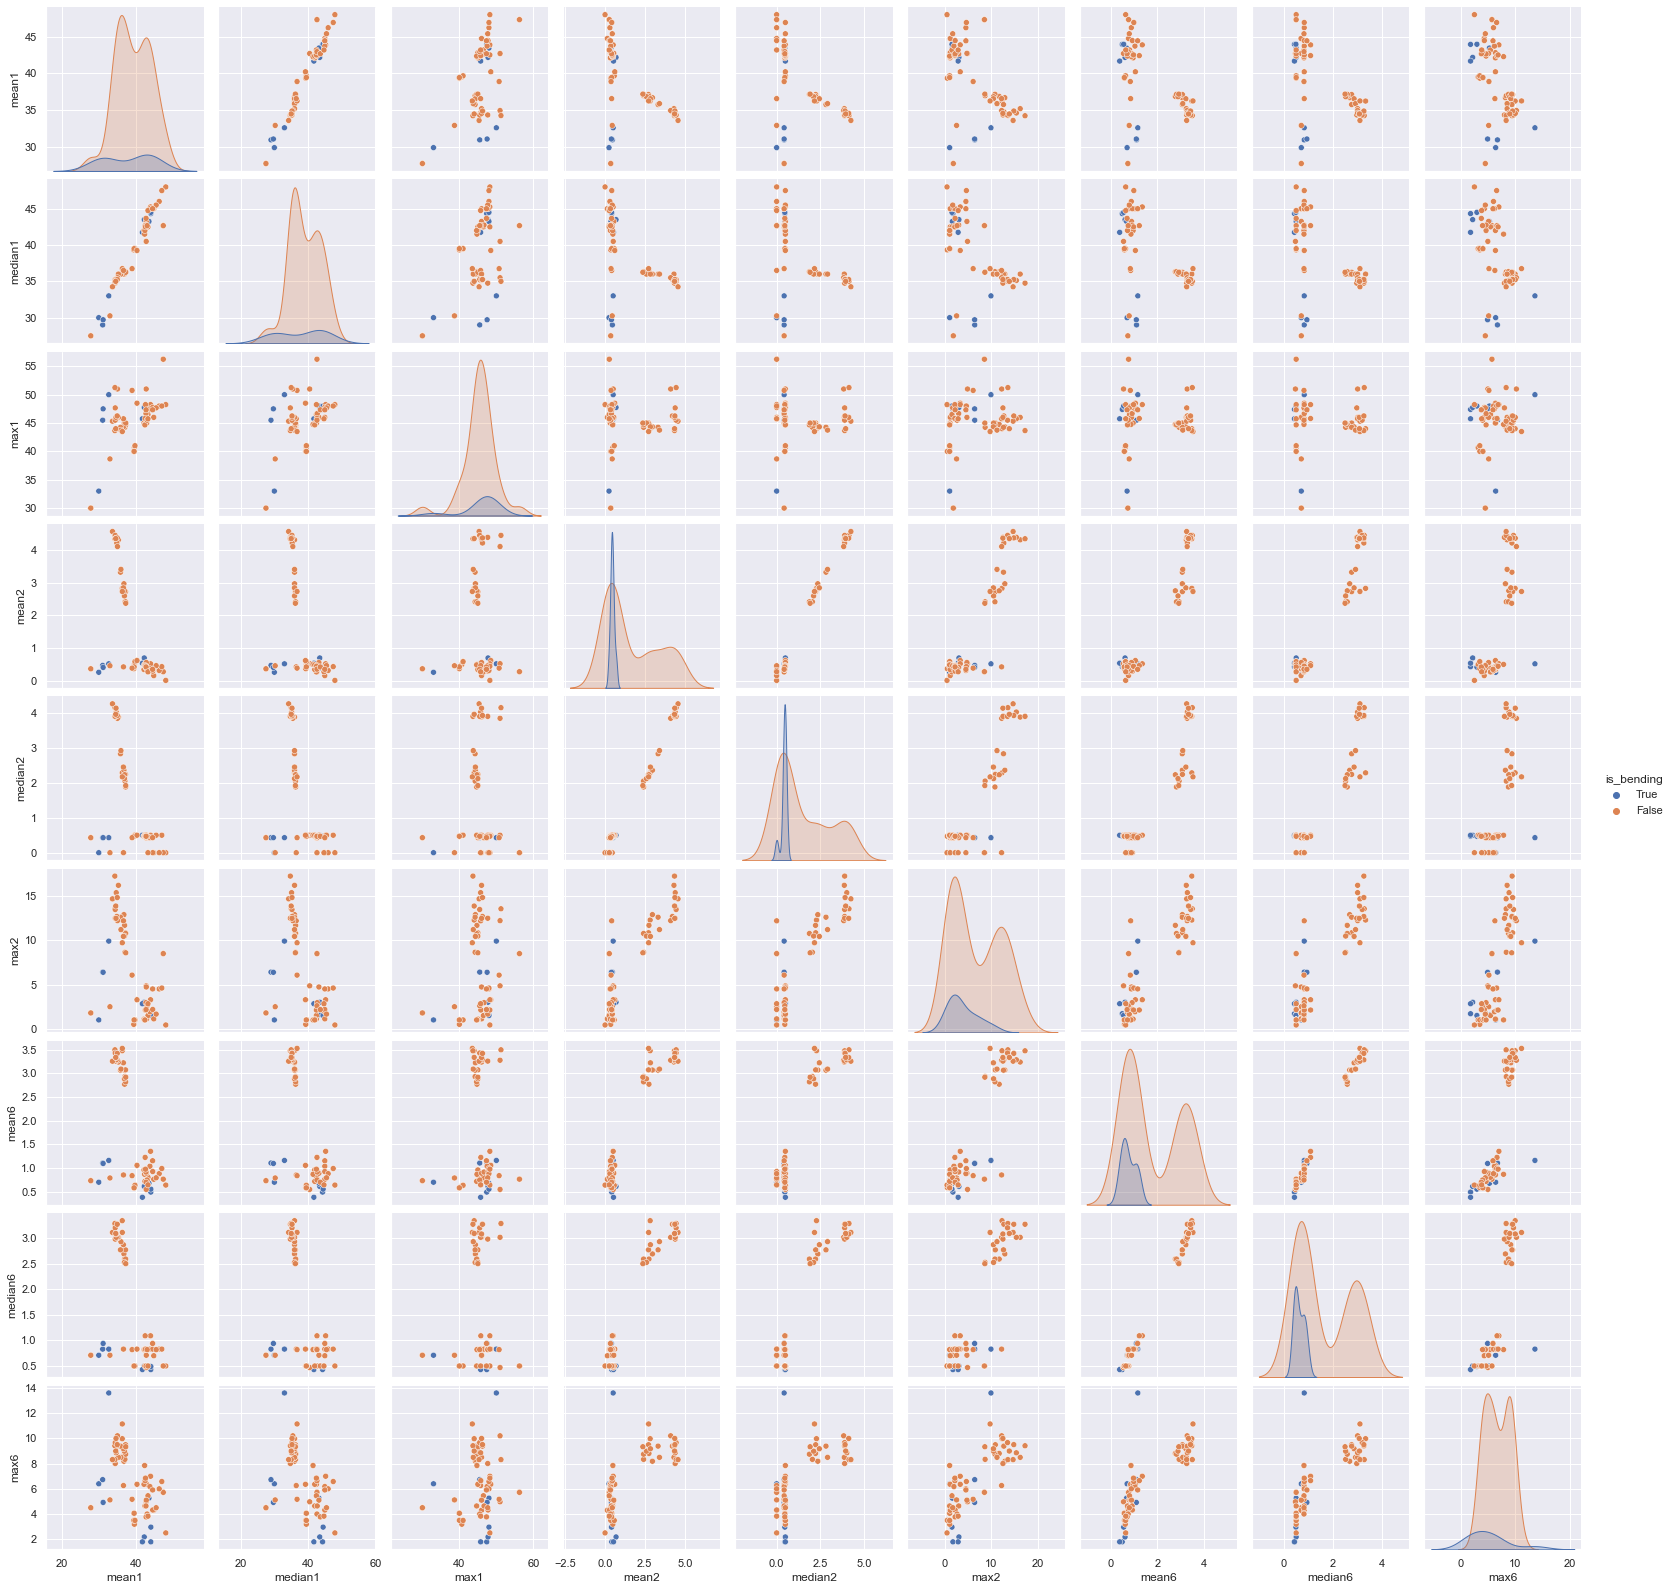

In [6]:
# depict scatter plots of the features specified in 1c)iv 
# feautures mean, median and max from 1, 2 and 6
#for each instance construct a scatter plot with mean median and max from 1,2,6 
col_names_tr = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
# minimum_tr = []
maximum_tr = []
mean_tr = []
median_tr = []
# std_tr = []
# first_quart_tr = []
# third_quart_tr = []

plotting_df = pd.DataFrame()
plotting_df.columns.name = 'Instance'
for df in train_data: 
    for name in col_names_tr:
#         minimum_tr.append(np.min(df.loc[:, name]))
        maximum_tr.append(np.max(df.loc[:, name]))
        mean_tr.append(np.mean(df.loc[:, name]))
        median_tr.append(np.median(df.loc[:, name]))
#         std_tr.append(np.std(df.loc[:, name]))
#         first_quart_tr.append(np.quantile(df.loc[:, name], .25))
#         third_quart_tr.append(np.quantile(df.loc[:, name], .75))
for i in range(0, 2):
#     plotting_df['min'+str(i+1)] = minimum_tr[i::6]
    plotting_df['mean'+str(i+1)] = mean_tr[i::6]
    plotting_df['median'+str(i+1)] = median_tr[i::6]
    plotting_df['max'+str(i+1)] = maximum_tr[i::6]
#     plotting_df['standard deviation'+str(i+1)] = std_tr[i::6]
#     plotting_df['1st quartile'+str(i+1)] = first_quart_tr[i::6]
#     plotting_df['3rd quartile'+str(i+1)] = third_quart_tr[i::6]
plotting_df['mean6'] = mean_tr[5::6]
plotting_df['median6'] = median_tr[5::6]
plotting_df['max6'] = maximum_tr[5::6]
is_bending = []
for i in range(0, 9):
    is_bending.append('True')
for i in range(9, 69):
    is_bending.append('False')
plotting_df['is_bending'] = is_bending 
plotting_df.index += 1


# plotting_df['mean1'] = new_dataset['mean1']
# plotting_df['median1'] = new_dataset['median1']
# plotting_df['max1'] = new_dataset['max1']
# plotting_df['mean2'] = new_dataset['mean2']
# plotting_df['median2'] = new_dataset['median2']
# plotting_df['max2'] = new_dataset['max2']
# plotting_df['mean6'] = new_dataset['mean6']
# plotting_df['median6'] = new_dataset['median6']
# plotting_df['max6'] = new_dataset['max6']
print(plotting_df)

# is_bending = []
# for i in range(1, 14):
#     is_bending.append('True')
# for i in range (14, 89):
#     is_bending.append('False')
# plotting_df['is_bending'] = is_bending
variables = ['mean1', 'median1', 'max1', 'mean2', 'median2', 'max2', 'mean6', 'median6', 'max6']
sns.set(color_codes = True)
sns.pairplot(plotting_df, vars= variables, hue = 'is_bending')
plt.show()

#### ii. Splitted Plots

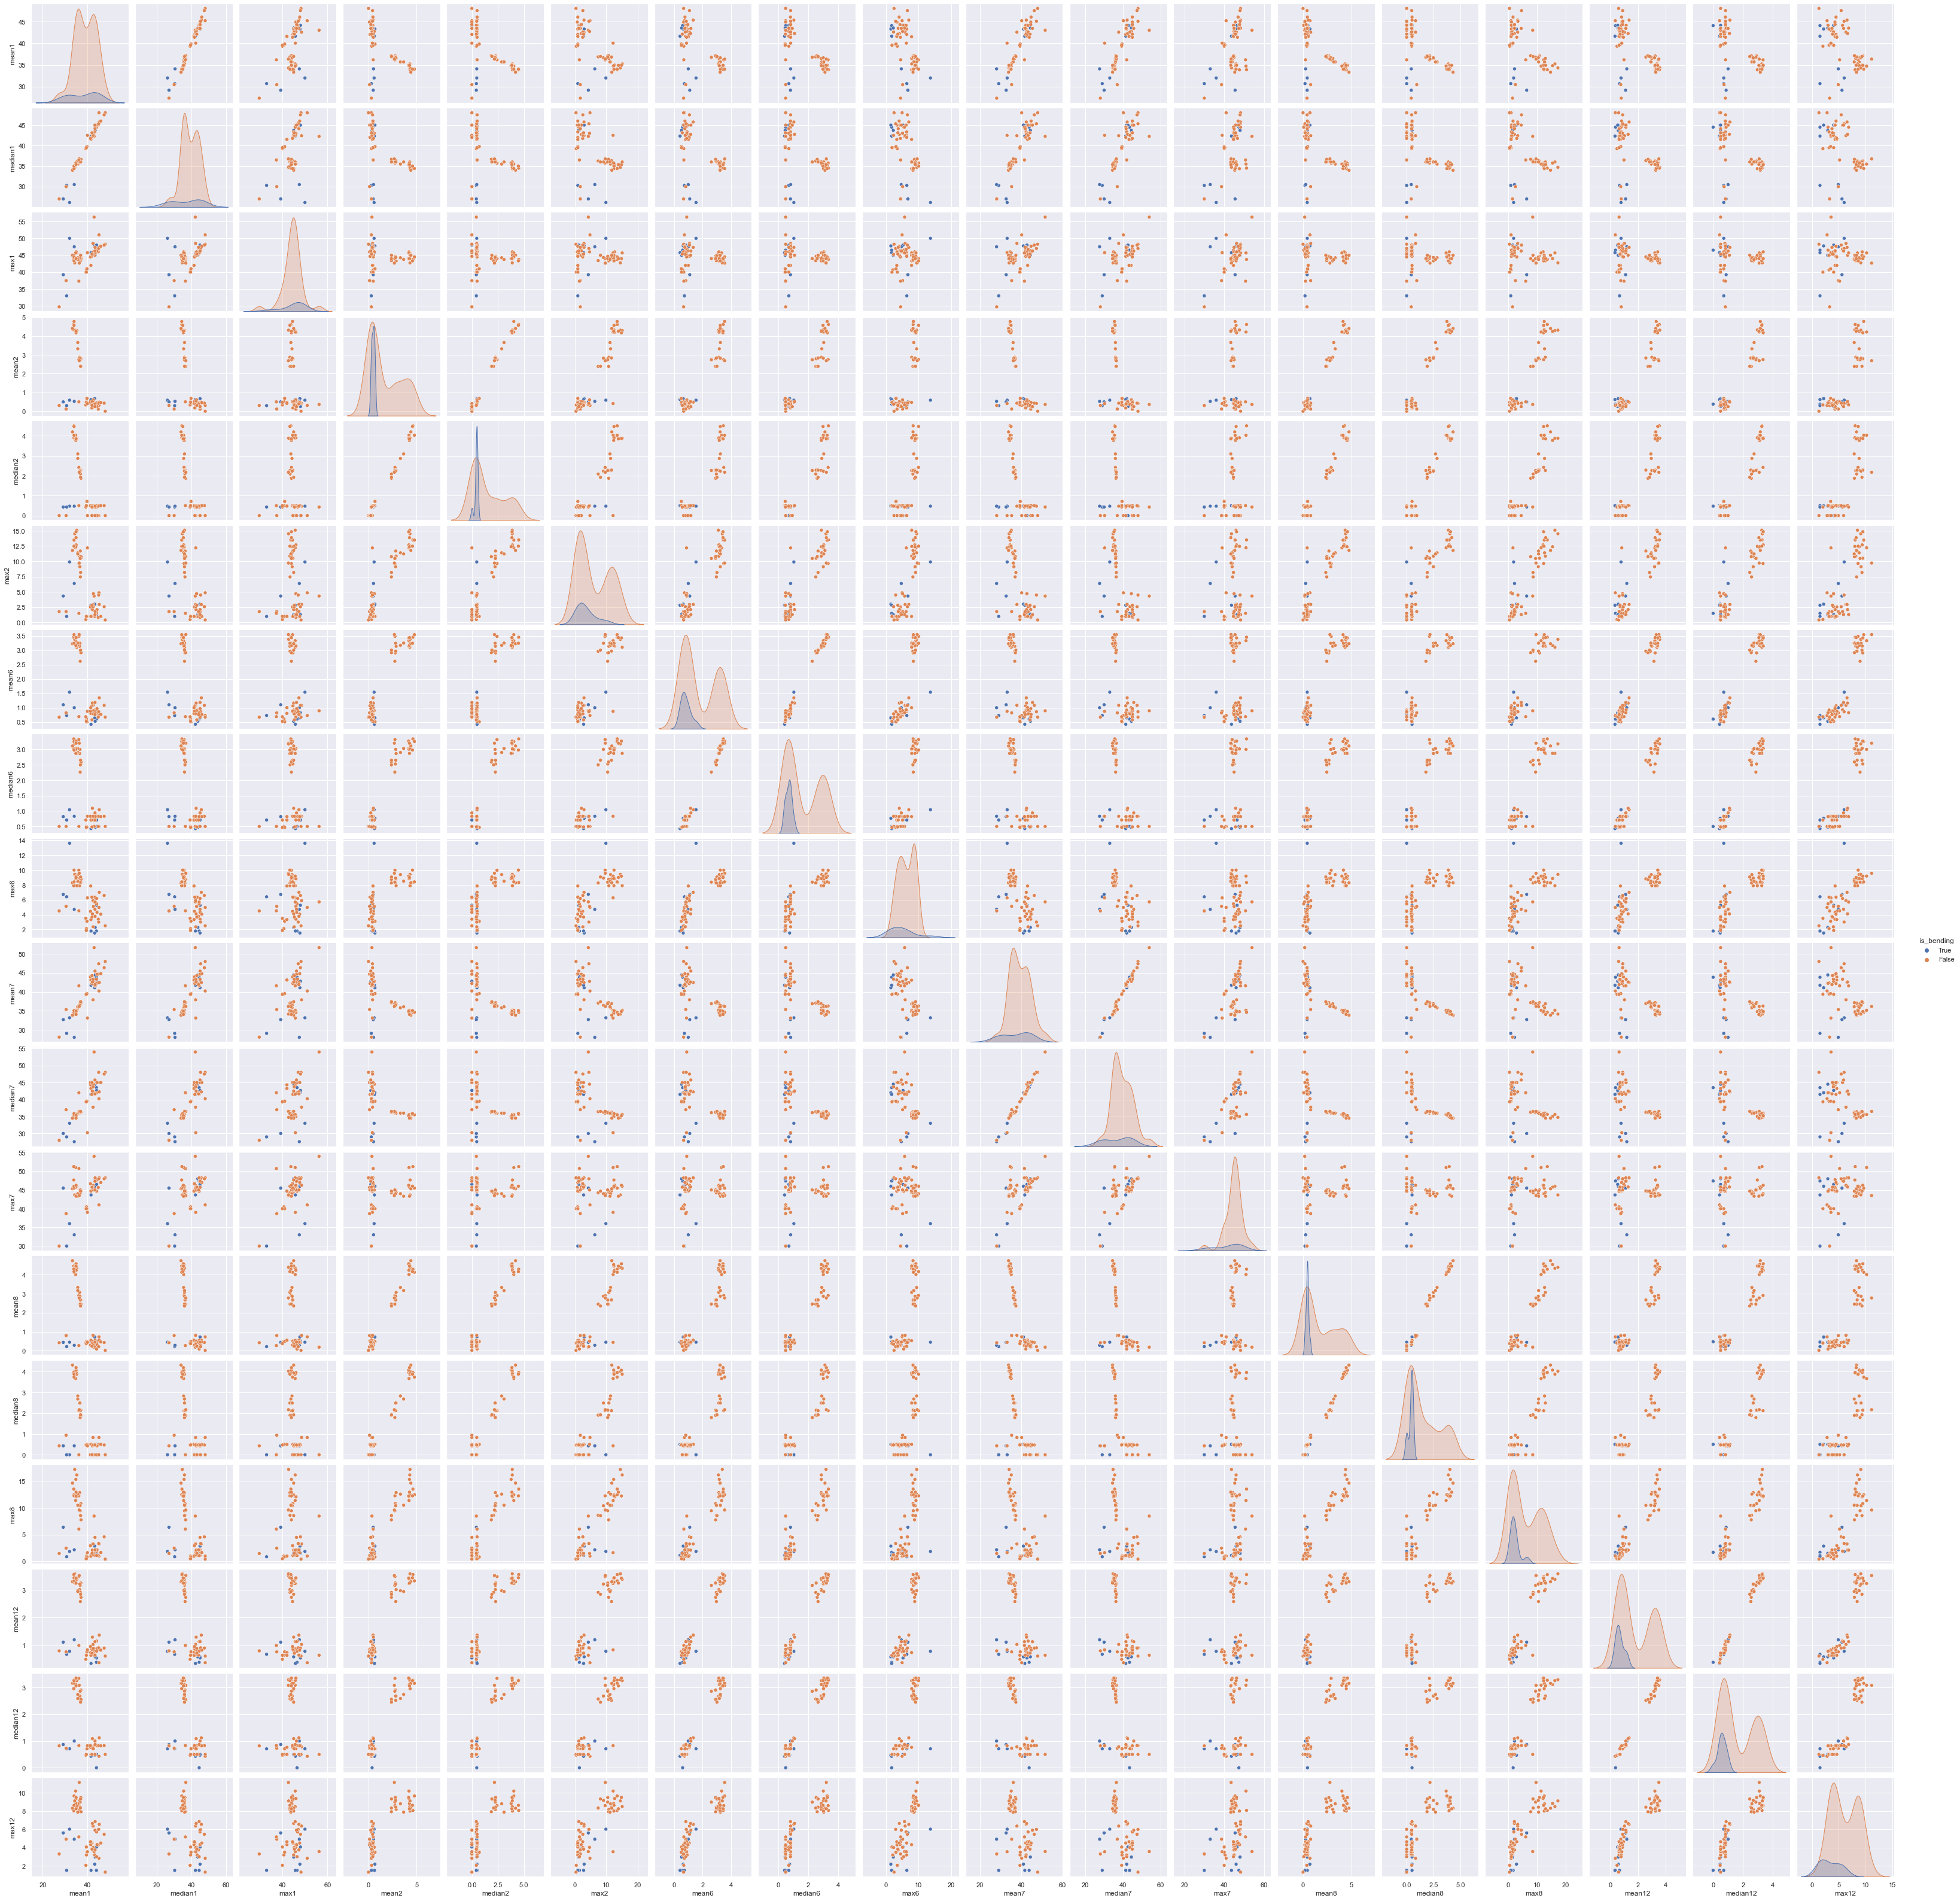

In [7]:
#break each time series in training set into two equal length time series

col_names_2 = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
minimum_2 = []
maximum_2 = []
mean_2 = []
median_2 = []
std_2 = []
first_quart_2 = []
third_quart_2 = []

minimum_3 = []
maximum_3 = []
mean_3 = []
median_3 = []
std_3 = []
first_quart_3 = []
third_quart_3 = []

plotting_df_2 = pd.DataFrame()
plotting_df_2.columns.name = 'Instance'
for df in train_data: 
    split_df = df.iloc[:240]
    split_df_2 = df.iloc[240:]
    for name in col_names_2:
        minimum_2.append(np.min(split_df.loc[:, name]))
        minimum_3.append(np.min(split_df_2.loc[:, name]))
        maximum_2.append(np.max(split_df.loc[:, name]))
        maximum_3.append(np.max(split_df_2.loc[:, name]))
        mean_2.append(np.mean(split_df.loc[:, name]))
        mean_3.append(np.mean(split_df_2.loc[:, name]))
        median_2.append(np.median(split_df.loc[:, name]))
        median_3.append(np.median(split_df_2.loc[:, name]))
        std_2.append(np.std(split_df.loc[:, name]))
        std_3.append(np.std(split_df_2.loc[:, name]))
        first_quart_2.append(np.quantile(split_df.loc[:, name], .25))
        first_quart_3.append(np.quantile(split_df_2.loc[:, name], .25))
        third_quart_2.append(np.quantile(split_df.loc[:, name], .75))
        third_quart_3.append(np.quantile(split_df_2.loc[:, name], .75))
        
for i in range(0, 6):
    plotting_df_2['min'+str(i+1)] = minimum_2[i::6]
    plotting_df_2['max'+str(i+1)] = maximum_2[i::6]
    plotting_df_2['mean'+str(i+1)] = mean_2[i::6]
    plotting_df_2['median'+str(i+1)] = median_2[i::6]
    plotting_df_2['standard deviation'+str(i+1)] = std_2[i::6]
    plotting_df_2['1st quartile'+str(i+1)] = first_quart_2[i::6]
    plotting_df_2['3rd quartile'+str(i+1)] = third_quart_2[i::6]
for i in range(0, 6):
    plotting_df_2['min'+str(i+7)] = minimum_3[i::6]
    plotting_df_2['max'+str(i+7)] = maximum_3[i::6]
    plotting_df_2['mean'+str(i+7)] = mean_3[i::6]
    plotting_df_2['median'+str(i+7)] = median_3[i::6]
    plotting_df_2['standard deviation'+str(i+7)] = std_3[i::6]
    plotting_df_2['1st quartile'+str(i+7)] = first_quart_3[i::6]
    plotting_df_2['3rd quartile'+str(i+7)] = third_quart_3[i::6]
is_bending_2 = []
for i in range(0, 9):
    is_bending_2.append('True')
for i in range(9, 69):
    is_bending_2.append('False')
plotting_df_2['is_bending'] = is_bending_2 
plotting_df_2.index += 1

variables_2 = ['mean1', 'median1', 'max1', 'mean2', 'median2', 'max2', 'mean6', 'median6', 'max6', 'mean7', 'median7', 'max7', 'mean8', 'median8', 'max8', 'mean12', 'median12', 'max12']
sns.set(color_codes = True)
sns.pairplot(plotting_df_2, vars= variables_2, hue = 'is_bending')
plt.show()


#### iii. Time Series Segments

In [15]:
col_names_3 = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
minimum_2 = []
maximum_2 = []
mean_2 = []
median_2 = []
std_2 = []
first_quart_2 = []
third_quart_2 = []

minimum_3 = []
maximum_3 = []
mean_3 = []
median_3 = []
std_3 = []
first_quart_3 = []
third_quart_3 = []

all_lists = []
plotting_df_3 = pd.DataFrame()
plotting_df_3.columns.name = 'Instance'

list_1 = []
list_2 = []
list_3 = []
list_4 = []
list_5 = []
list_6 = []
list_7 = []
list_8 = []
list_9 = []
list_10 = []
list_11 = []
list_12 = []
list_13 = []
list_14 = []
list_15 = []
list_16 = []
list_17 = []
list_18 = []
list_19 = []
list_20 = []

split_by_list = []
for l in range(1,21):
    #want to split data by these numbers
    split_by = round(480/l)
    split_by_list.append(split_by)

# for df in train_data: 
#     for i in split_by_list:
#         for j in range(1,21):
#             if j = 1:
#                 split_df = df.iloc[:i]
#                 for name in col_names_3:
#     #                 all_lists.append([np.min(split_df.loc[:, name])])
#                     list_1.append([np.max(split_df.loc[:, name])])
#                     list_1.append([np.mean(split_df.loc[:, name])])
#                     list_1.append([np.median(split_df.loc[:, name])])
#     #                 all_lists.append([np.std(split_df.loc[:, name])])
#     #                 all_lists.append([np.quantile(split_df.loc[:, name], .25)])
#     #                 all_lists.append([np.quantile(split_df.loc[:, name], .75)])
#             elif i == 240:
#                 count += 1
#                 split_df = df.iloc[i*24:((i+1)*24)]
#                 for name in col_names_3:
#         #                 all_lists[0].append(np.min(split_df.loc[:, name]))
#                     all_lists[0].append(np.max(split_df.loc[:, name]))
#                     all_lists[1].append(np.mean(split_df.loc[:, name]))
#                     all_lists[2].append(np.median(split_df.loc[:, name]))
#     #                 all_lists[4].append(np.std(split_df.loc[:, name]))
#     #                 all_lists[5].append(np.quantile(split_df.loc[:, name], .25))
#     #                 all_lists[6].append(np.quantile(split_df.loc[:, name], .75))

# NEW
for l in range(1,21): #want to get set of L's
    print('Split Number: '+str(l))
    plotting_df_3 = pd.DataFrame()
    plotting_df_3.columns.name = 'Instance'
    for j in range(0,l): #each number in l
#         for k in [0,1,5]:
        mean_val = []
        median_val = []
        max_val = []
        division = 480 // l
        mod = 480 % l
        starting_point = 480 - mod
        print('starting_point: '+str(starting_point))
        count = 0
        for df in train_data: #for each dataframe 
            start_val = division*j
            last_val = division*(j+1)
            remainder = 0
            if mod != 0:
                if last_val == starting_point:
                    count += 1
                    split_df = df.iloc[start_val:480]
                    for name in col_names_3:
                        max_val.append(np.max(split_df.loc[:, name]))
                        mean_val.append(np.mean(split_df.loc[:, name]))
                        median_val.append(np.median(split_df.loc[:, name]))
                else: 
                    count += 1
                    split_df = df.iloc[start_val:(last_val)]
                    for name in col_names_3:
                        max_val.append(np.max(split_df.loc[:, name]))
                        mean_val.append(np.mean(split_df.loc[:, name]))
                        median_val.append(np.median(split_df.loc[:, name]))
                        
            else:
                count += 1
                split_df = df.iloc[start_val:last_val]
                for name in col_names_3:
                    max_val.append(np.max(split_df.loc[:, name]))
                    mean_val.append(np.mean(split_df.loc[:, name]))
                    median_val.append(np.median(split_df.loc[:, name]))
                print(len(max_val))
                print(len(mean_val))
                print(len(median_val))      
        for i in range(0, 3*l):
            plotting_df_3['max'+str(i+1)] = max_val[i::6]
            plotting_df_3['mean'+str(i+1)] = mean_val[i::6]
            plotting_df_3['median'+str(i+1)] = median_val[i::6]
        print(plotting_df_3)

                    
# for l in range(1, 21):
#     for j in range(0,l):
#         plotting_df_3 = pd.DataFrame()
#         plotting_df_3.columns.name = 'Instance'
#         division = 480 // l
#         mod = 480 % l
#         mean_val = []
#         median_val = []
#         max_val = []
#         for df in train_data: #for each dataframe 
#             start_val = division*j
#             last_val = division*(j+1)
#             if mod != 0:
#                 if l-j <= mod:
#                     start = (j*(l+1))
#                     end = ((j+1)*(l+1))
#             for name in col_names_3:
#                 max_val.append(np.max(split_df.loc[:, name]))
#                 mean_val.append(np.mean(split_df.loc[:, name]))
#                 median_val.append(np.median(split_df.loc[:, name]))
        
#         for i in range(0, 3*l):
#             plotting_df_3['max'+str(i+1)] = max_val[i::6]
#             plotting_df_3['mean'+str(i+1)] = mean_val[i::6]
#             plotting_df_3['median'+str(i+1)] = median_val[i::6]
#         print(plotting_df_3)

    
#     for df in train_data: #go in to each dataframe
#         mean_val = []
#         median_val = []
#         max_val = []
#         #while in dataframe keep splitting if number less than 480
#         if i = 480:
#             split_df = df.iloc[:i]
#             for name in col_names_3:#splitting by each dataset
#                 max_val.append(np.max(split_df.loc[:, name]))
#                 mean_val.append(np.mean(split_df.loc[:, name]))
#                 median_val.append(np.median(split_df.loc[:, name]))
#             for j in range(0,6):
#                 plotting_df_3['max'+str(i+1)] = max_val[j::6]
#                 plotting_df_3['mean'+str(i+1)] = mean_val[j::6]
#                 plotting_df_3['median'+str(i+1)] = median_val[j::6]
#         else:
#             for k in range(1,20):
#                 split_df = df.iloc[k*i:((k+1)*i)]
                
#first list represents the min of first column, first split.
#second list represents tthe max of the first column
# print(len(all_lists[0]))
# print(len(all_lists[1]))
# for a in range(0, 69):
#     for i in range(0, 20):
    #     plotting_df_3['min'+str(i+1)] = all_lists[0][i::20]
#         plotting_df_3['max'+str(i+1)] = all_lists[0][i:1306:6]
#         plotting_df_3['max'+str(i+1)] = all_lists[0][1306::7]
#         plotting_df_3['mean'+str(i+1)] = all_lists[1][i::6]
#         plotting_df_3['median'+str(i+1)] = all_lists[2][i::6]
    #     plotting_df_3['standard deviation'+str(i+1)] = all_lists[4][i::20]
    #     plotting_df_3['1st quartile'+str(i+1)] = all_lists[5][i::20]
    #     plotting_df_3['3rd quartile'+str(i+1)] = all_lists[6][i::20]
# plotting_df_3
# for i in range(0, 6):
#     plotting_df_2['min'+str(i+7)] = minimum_3[i::6]
#     plotting_df_2['max'+str(i+7)] = maximum_3[i::6]
#     plotting_df_2['mean'+str(i+7)] = mean_3[i::6]
#     plotting_df_2['median'+str(i+7)] = median_3[i::6]
#     plotting_df_2['standard deviation'+str(i+7)] = std_3[i::6]
#     plotting_df_2['1st quartile'+str(i+7)] = first_quart_3[i::6]
#     plotting_df_2['3rd quartile'+str(i+7)] = third_quart_3[i::6]

Split Number: 1
starting_point: 480
6
6
6
12
12
12
18
18
18
24
24
24
30
30
30
36
36
36
42
42
42
48
48
48
54
54
54
60
60
60
66
66
66
72
72
72
78
78
78
84
84
84
90
90
90
96
96
96
102
102
102
108
108
108
114
114
114
120
120
120
126
126
126
132
132
132
138
138
138
144
144
144
150
150
150
156
156
156
162
162
162
168
168
168
174
174
174
180
180
180
186
186
186
192
192
192
198
198
198
204
204
204
210
210
210
216
216
216
222
222
222
228
228
228
234
234
234
240
240
240
246
246
246
252
252
252
258
258
258
264
264
264
270
270
270
276
276
276
282
282
282
288
288
288
294
294
294
300
300
300
306
306
306
312
312
312
318
318
318
324
324
324
330
330
330
336
336
336
342
342
342
348
348
348
354
354
354
360
360
360
366
366
366
372
372
372
378
378
378
384
384
384
390
390
390
396
396
396
402
402
402
408
408
408
414
414
414
Instance   max1      mean1  median1   max2     mean2  median2   max3  \
0         47.40  43.954500    44.33   1.70  0.426250    0.470  29.75   
1         47.75  42.179813    43.50   3.00 

36
36
36
42
42
42
48
48
48
54
54
54
60
60
60
66
66
66
72
72
72
78
78
78
84
84
84
90
90
90
96
96
96
102
102
102
108
108
108
114
114
114
120
120
120
126
126
126
132
132
132
138
138
138
144
144
144
150
150
150
156
156
156
162
162
162
168
168
168
174
174
174
180
180
180
186
186
186
192
192
192
198
198
198
204
204
204
210
210
210
216
216
216
222
222
222
228
228
228
234
234
234
240
240
240
246
246
246
252
252
252
258
258
258
264
264
264
270
270
270
276
276
276
282
282
282
288
288
288
294
294
294
300
300
300
306
306
306
312
312
312
318
318
318
324
324
324
330
330
330
336
336
336
342
342
342
348
348
348
354
354
354
360
360
360
366
366
366
372
372
372
378
378
378
384
384
384
390
390
390
396
396
396
402
402
402
408
408
408
414
414
414


ValueError: Length of values (68) does not match length of index (69)

#### iv. Confusion Matrix

In [9]:
train_data[2]

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,44.33,0.47,23.75,0.43,30.00,0.00
1,250,44.50,0.50,24.00,0.00,30.25,0.43
2,500,44.00,0.71,24.00,0.00,30.50,0.50
3,750,43.00,0.71,21.75,1.30,31.50,1.12
4,1000,42.75,0.43,25.00,2.24,35.25,1.30
...,...,...,...,...,...,...,...
475,118750,42.50,0.87,21.50,0.50,30.50,0.50
476,119000,42.50,0.50,21.00,0.00,30.00,0.00
477,119250,42.25,0.43,20.75,0.43,30.00,0.00
478,119500,40.50,1.12,23.50,0.87,29.50,0.50


#### v. Test Classifier

#### vi. Separation

#### vii. Imbalance

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

#### ii. Comparison

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

#### ii. Naive Bayes

#### ii. Comparison

## 3. ISLR 4.8.3

## 4. ISLR 4.8.7

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9